# Librerias

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
plt.style.use('dark_background')

# Datos

In [52]:
datos0=pd.read_csv('0) Estimación Volumen inicial del gas.txt')
#datos1=pd.read_csv('1) Aumento de temperatura isocórico.txt')
#datos2=pd.read_csv('2) Expansión isotérmica.txt')
#datos3=pd.read_csv('3) Descenso de temperatura isocórica.txt')
#datos4=pd.read_csv('4) Compresión isotérmica.txt')

datos0['1/P(1/KPa)']=1/datos0['P(Kpa)']

# Volumen inicial del Gas dentro del recipiente

Text(0.5, 1.0, 'V vs 1/P')

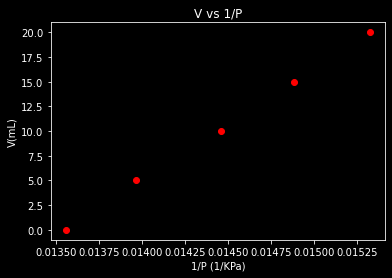

In [53]:
fig, ax = plt.subplots()

ax.scatter(datos0['1/P(1/KPa)'],datos0['V(mL)'],color='red')
ax.set_ylabel('V(mL)')
ax.set_xlabel('1/P (1/KPa)')
ax.set_title('V vs 1/P')

ajuste: $$V=\frac{1}{P}m+b$$

Hacemos una ajuste lineal V vs (1/P).
 
El ajuste V(1/P)=m(1/P)+b,tiene como parámetros:
 
m=(11212+-160)KPa*mL, b=(-152+-2)mL.
Gráficando V vs (1/P) con el ajuste y comparando los puntos experimentales tenemos:
Por ende el volumen inicial del gas es(-punto de corte eje vertical gráfica anterior): 152 mL


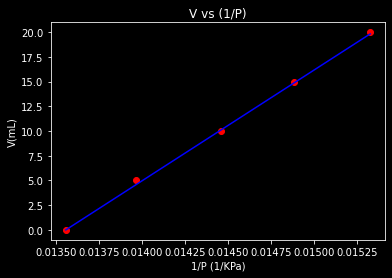

In [54]:
def func(x, m, b):
    return m*x+b

print('Hacemos una ajuste lineal V vs (1/P).')
print(' ')

ajuste,covarianza= curve_fit(func,datos0['1/P(1/KPa)'].tolist(),datos0['V(mL)'].tolist())
desviacionestandar=np.sqrt(np.diag(covarianza))
m=round(ajuste[0])
b=round(ajuste[1])
Δm=round(desviacionestandar[0])
Δb=round(desviacionestandar[1])
Vi=-b
print('El ajuste V(1/P)=m(1/P)+b,tiene como parámetros:')
print(' ')
print(str('m=(')+str(m)+str('+-')+str(Δm)+str(')KPa*mL,'),str('b=(')+str(b)+str('+-')+str(Δb)+str(')mL.'))
print('Gráficando V vs (1/P) con el ajuste y comparando los puntos experimentales tenemos:')

fig,ax = plt.subplots() 

x0=datos0['1/P(1/KPa)'].tolist()[0]
xf=datos0['1/P(1/KPa)'].tolist()[-1]
x=np.linspace(x0,xf,1000)

ax.scatter(datos0['1/P(1/KPa)'],datos0['V(mL)'],color='red')
ax.plot(x,(x*m)+b,color='blue')
ax.set_xlabel('1/P (1/KPa)')  
ax.set_ylabel('V(mL)')  
ax.set_title('V vs (1/P)')

print('Por ende el volumen inicial del gas es(-punto de corte eje vertical gráfica anterior):',str(Vi),'mL')


# Ciclo termodinámico